In [396]:
dut.disconnect()

Serial port disconnected.


In [29]:
dut.ground_PIC()

DAC initialized to a span from -5 V to 5 V


In [12]:
dut.reset_chip()
dut.reset_dpe()

In [28]:
dut.power_off()

In [296]:
%reload_ext autoreload
%autoreload 2

import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
# %config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

ser = serial.Serial('COM3', 9600, timeout=2)
dut.connect(ser)


In [30]:
dut.power_on()
dut.reset_chip()
dut.reset_dpe()

In [109]:
drv.gpio_pin_set('H', 1)

Calibrate all 12 ADCs on A0

In [200]:
ar=2
r=31
c=0

Vreads = np.arange(0, 0.5, 0.01)
# Vgates = np.arange(0,5,0.5)
# Vgates = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 5]
Vgates = [5]

volts_set = []

for Vgate in Vgates:
    print(f'{Vgate:.2f}', end='-')
    volts = []
    for vread in Vreads:
        volts.append( a0.read_single(vread, Vgate, array=ar, row=r, col=c, gain=4) )
    volts_set.append(volts)

5.00-

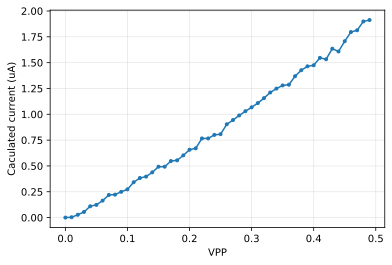

In [201]:
for volts in volts_set:
    plt.plot(Vreads, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('VPP')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)
# plt.ylim(-0.1, 6)

5.00-

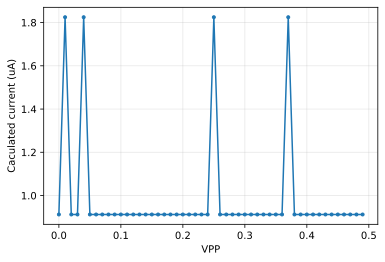

In [301]:
ar=2
r=0
c=61

Vreads = np.arange(0, 0.5, 0.01)
# Vgates = np.arange(0,5,0.5)
# Vgates = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 5]
# Vgates = [4, 3, 2, 1.5]
Vgates = [5]
Vref = 0.5

volts_set = []

for Vgate in Vgates:
    print(f'{Vgate:.2f}', end='-')
    volts = []
    for vread in Vreads:
        volts.append( a0.read_dpe_single_int(vread, Vgate, array=ar, row=r, col=c, gain=2, Vref = Vref) )
    volts_set.append(volts)
    
for volts in volts_set:
    plt.plot(Vreads, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('VPP')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)
# plt.ylim(-0.1, 6)

In [298]:
ar=2
r=31
c=0


Vread=0.1
Vgate=5

curr_list = []
# a0.read_single_int(Vread, Vgate, array=ar, row=r, col=c, gain=2) * 1e6
for Tsh in range(100):
    curr_list.append( a0.read_single_int(Vread, Vgate, array=ar, row=r, col=c, gain=2, Tsh=Tsh) )

0100001110000
0100000001000
0100000001000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001110000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
0100001100000
010000

Text(0, 0.5, 'Current @ 0.2 V')

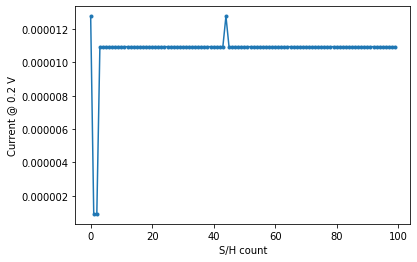

In [299]:
plt.plot(range(100), curr_list, '.-')
# plt.ylim(0,7e-5)
plt.xlabel('S/H count')
plt.ylabel('Current @ 0.2 V')
# for i in range(256):
#     print(f'{i} - {curr_list[i]}')

In [36]:
Vread=0.1
Vgate=5

curr_list = []
for Tsh in range(256):
    curr_list.append( a0.read_single(vread, Vgate, array=ar, row=r, col=c, gain=2) )

(0, 7e-05)

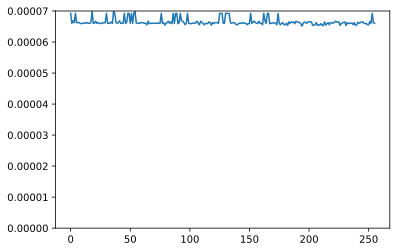

In [37]:
plt.plot(range(256), curr_list)
plt.ylim(0,7e-5)

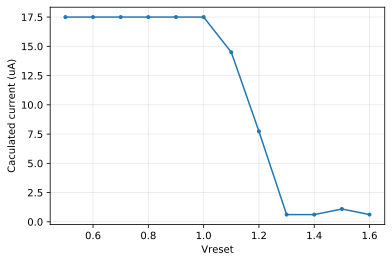

In [126]:
ar=2
r=8
c=4

Vreset = np.arange(0.5, 1.7, 0.1)
Vgate = 5
Vread = 0.2
volts = []
for Vr in Vreset:
    a0.reset_single_int(Vr, Vgate, array=ar, row=r, col=c)
    volts.append( a0.read_single_int(Vread, Vgate, array=ar, row=r, col=c, gain=3) )
    

plt.plot(Vreset, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('Vreset')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)
# plt.ylim(-0.1, 6)
    

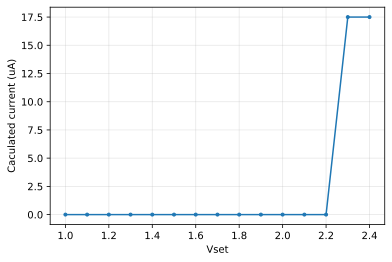

In [154]:
ar=2
r=46
c=25

Vset = np.arange(1, 2.5, 0.1)
Vgate = 1.5
Vread = 0.2
volts = []

for Vs in Vset:
    a0.set_single_int(Vs, Vgate, array=ar, row=r, col=c)
    volts.append( a0.read_single_int(Vread, Vgate, array=ar, row=r, col=c, gain=3) )
    

plt.plot(Vset, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('Vset')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)
# plt.ylim(-0.1, 6)
    

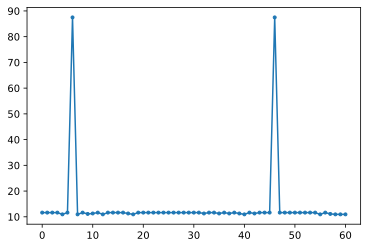

In [158]:
ar = 2
c = 25

Vread = 0.2
row = np.arange(0, 61, 1)
Vgate = 3
volts =[]

for r in row:
    volts.append( a0.read_dpe_single(Vread, Vgate, array=ar, row=r, col=c, gain=3) )

plt.plot(row, [a/0.2*1e6 for a in volts], '.-')


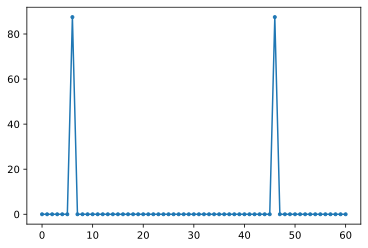

In [160]:
ar = 2
c = 25

Vread = 0.2
row = np.arange(0, 61, 1)
Vgate = 3
volts =[]

for r in row:
    volts.append( a0.read_single_int(Vread, Vgate, array=ar, row=r, col=c, gain=3) )

plt.plot(row, [a/0.2*1e6 for a in volts], '.-')

In [162]:
row = [1, 3]
index = []
for r in row:
    index.append(r)
    index.append(3)
print(index)

[1, 3, 3, 3]


In [312]:
ar = 2
c = 5

Vread = 0.1
Vgate = 5
data1 = a0.read_dpe_col_int(Vread, Vgate, array=ar, row=[0], col=c, gain=3)
# data1 = a0.read_dpe_col_int(Vread, Vgate, array=ar, row=[0], col=c, gain=2)/0.2*1e6
# data2 = a0.read_dpe_col_int(Vread, Vgate, array=ar, row=[46], col=c, gain=2)/0.2*1e6
# data3 = a0.read_dpe_col_int(Vread, Vgate, array=ar, row=[6, 46, 0, 2], col=c, gain=2)/0.2*1e6

print(data1)

1.67644183773216e-06


In [297]:
print(dut.data_generate_vector([0,0,0,1], [0, 0, 0, 1]))
print(dut.data_generate_sparse([0, 0]))

[0, 0, 1, 0, 32768, 0, 0, 0]
[0, 0, 1, 0, 32768, 0, 0, 0]


In [302]:
Vread = 0.1
Vgate = 5
row_vector = [0, 0, 0, 1]
volt = a0.read_dpe_int(Vread, Vgate, row_vector, array=2, gain=3, Vref=0.5)
print(volt)

[2.189638318670577e-06, 7.732160312805474e-06, 2.8054740957966762e-06, 1.0948191593352885e-06, 0.0, 1.7790811339198436e-06, 2.737047898338221e-06, 3.558162267839687e-06, 1.1752199413489736e-05, 4.516129032258065e-06, 4.379276637341154e-06, 5.20039100684262e-06, 5.131964809384164e-06, 2.189638318670577e-06, 1.3685239491691093e-07, 0.0, 0.0, 0.0, 5.901759530791789e-06, 1.531036168132942e-05, 6.089931573802542e-06, 1.366813294232649e-05, 0.0, 0.0, 0.0, 3.0107526881720425e-06, 0.0, 0.0, 3.626588465298143e-06, 4.926686217008797e-06, 5.6109481915933524e-06, 4.379276637341154e-06, 0.0, 5.884652981427175e-06, 7.834799608993157e-06, 5.474095796676442e-07, 0.0, 0.0, 1.0948191593352885e-06, 4.379276637341154e-06, 0.0, 0.0, 2.189638318670577e-06, 2.189638318670577e-06, 2.189638318670577e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8739002932551316e-06, 2.4633431085043987e-06, 3.9687194525904206e-06, 8.46774193548387e-06, 1.0948191593352885e-06, 0.0, 1.202590420332356e-05, 6.637341153470185e-06, 6.8426197458455

In [192]:
for b in range(0, 32, 2):
    print(b)

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30


In [291]:
[fifo_en, channel] = dut.which_fifo([2, 63])
print(fifo_en, channel)

7 7


In [321]:
Vread = 0.2
Vgate = 5
array = 2
Gmap = np.zeros((64,64))
for r in range(64):
    print(r)
    for c in range(64):
        Gmap[r, c] = a0.read_dpe_single_int(Vread, Vgate, array=array, row=r, col=c, gain=3)/0.2

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63


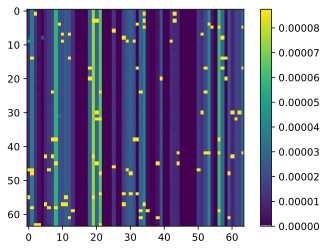

In [324]:
plt.imshow(Gmap)
plt.colorbar()

In [39]:
Vread = 0.2
Vgate =5
Gmap = np.zeros((64, 64))
for a in range(4):
    for b in range(16):
        row_vector = [0, 0, 0, 0]
        row_vector[3-a] = 0b1 << b
        Gmap[16*a+b] = a0.read_dpe_int(Vread, Vgate, row_vector, array=2, gain=3, Vref=0.5)


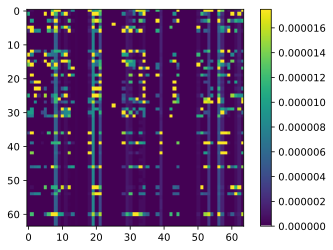

In [40]:
plt.imshow(Gmap)
plt.colorbar()

In [ ]:
Vread = 0.2
Vgate = 5
array = 2
Gmap = np.zeros((64,64))
for r in range(64):
    print(r, end='-')
    for c in range(64):
        Gmap[r, c] = a0.read_single_int(Vread, Vgate, array=array, row=r, col=c, gain=3)/0.2

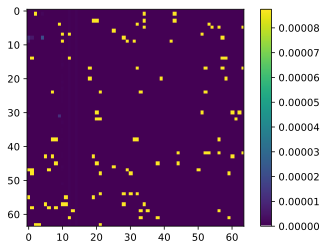

In [8]:
plt.imshow(Gmap)
plt.colorbar()

In [305]:
a0.read_single_int(0.2, 5, array=2, row=31, col=0, gain=2)

0100011000000


2.1896383186705763e-05

In [365]:
_gain_table = [
    '0b1111100001',
    '0b1111100010',
    '0b1101000100',
    '0b1100001000',
    '0b1100010000',
    ]

VREF_TIA = 0.5
VREF_LO = 0.5

Vread = 0.2
Tsh = 0x0c
Vgate=5
gn = 2

dut.scan_control(scan_ctrl_bits=bytes([0x10, 0x02, 0x0c, 0x10,
                                       Tsh, 0x01, 0x02]))

dut.scan_tia( BitArray(_gain_table[gn]*96).bytes )


assert VREF_TIA - Vread > -0.2 and VREF_TIA - Vread <= 1

dut.dac_set('PLANE_VPP', VREF_TIA - Vread)
dut.dac_set('P_VREF_TIA', VREF_TIA)
dut.dac_set('P_TVDD', Vgate)

dut.pads_defaults()

dut.reset_dpe()

In [361]:
# dut.reset_dpe()

drv.ser.write(b'401,2,31,0\0')
value = drv.ser.read(2)
value = struct.unpack('<H', value)
print(f'{value[0]:013b}')
print((dut.adc2volt(value[0]) -  0.5) / a0._gain_ratio[gn])

0100011000000
2.1896383186705763e-05


In [394]:
Gmap = np.zeros((64, 64))
arr = 0
gn=2

a0.pic_read_config(gain=gn)

for r in range(64):
    for c in range(64):
#         drv.ser.write(f'401,{arr},{r},{c}\0'.encode())
#         value = drv.ser.read(2)
#         value = struct.unpack('<H', value)[0]
# #         print(f'{value:013b}')
#         value = (dut.adc2volt(value) -  0.5) / a0._gain_ratio[1] / 0.2
        value = a0.pic_read_single(arr, r, c, skip_conf=True, gain=gn)
        Gmap[r,c] = value
        time.sleep(0.005)

(0, 0.0007)

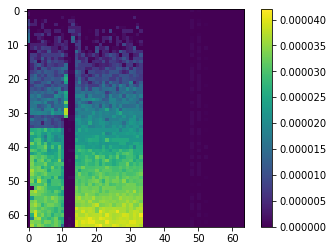

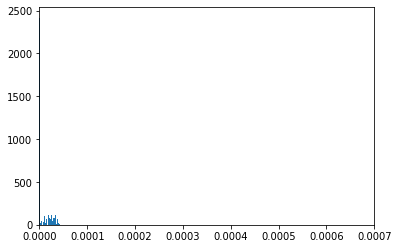

In [395]:
plt.figure(1)
plt.imshow(Gmap)
plt.colorbar()

plt.figure(2)
plt.hist(Gmap.reshape(-1,1), bins=30)
plt.xlim(0, 700e-6)

In [161]:
drv.ser.flushInput()

PIC single read!

In [164]:
a0.pic_read_single(2,1,2, gain=2)

0.00011301726946888238

In [81]:
gain=2
f"{gain},ahha\0".encode()

b'2,ahha\x00'

In [96]:
dut.py_logic_analyzer()

1 	PWR_GOOD
1 	NRESET_FULL_CHIP
1 	NRESET_DPE_ENGINE
0 	ARRAY_EN<0>
0 	ARRAY_EN<1>
1 	ARRAY_EN<2>
0 	NFORCE_SAFE0
0 	NFORCE_SAFE1
1 	NFORCE_SAFE2
0 	ADC_SEL_EXT
0 	DPE_EXT_OVERRIDE_EN
0 	DPE_EXT_SH
1 	ADC_DONE
0 	ADC_FIFO_ADVANCE
1 	ADC_FIFO_EN<0>
1 	ADC_FIFO_EN<1>
1 	ADC_FIFO_EN<2>
0 	ADC_FIFO_EN<3>


In [19]:
from dut_func import *

Test PIC download_fofo()

In [1]:
addr_fifo = 0

reset_dpe()
drv.gpio_array_en_write(0b111)
drv.gpio_nforce_safe_write(0b111)

drv.gpio_pin_set(*PIC_PINS['ADC_SEL_EXTERNAL'])
# time.sleep(1e-6)       # delay(t_en_overide_sh), min = 0CK
drv.gpio_pin_set(*PIC_PINS['DPE_EXT_OVERRIDE_EN'])
time.sleep(1e-6)        # delay(t_fire_sh), min = 3CK
drv.gpio_pin_set(*PIC_PINS['DPE_EXT_SH'])


dac_set('P_ADC_EXT_TEST_IN', 1)

drv.gpio_pin_reset(*PIC_PINS['DPE_EXT_SH'])
reset_dpe()
drv.gpio_pin_set(*PIC_PINS['DPE_EXT_SH'])

data_fifo = download_fifo(addr_fifo)
[hex(d) for d in data_fifo]

NameError: name 'reset_dpe' is not defined

In [18]:
addr_fifo = 0

reset_dpe()
drv.gpio_array_en_write(0b111)
drv.gpio_nforce_safe_write(0b111)

drv.gpio_pin_set(*PIC_PINS['ADC_SEL_EXTERNAL'])
# time.sleep(1e-6)       # delay(t_en_overide_sh), min = 0CK
drv.gpio_pin_set(*PIC_PINS['DPE_EXT_OVERRIDE_EN'])
time.sleep(1e-6)        # delay(t_fire_sh), min = 3CK
drv.gpio_pin_set(*PIC_PINS['DPE_EXT_SH'])


dac_set('P_ADC_EXT_TEST_IN', 1)

drv.gpio_pin_reset(*PIC_PINS['DPE_EXT_SH'])
reset_dpe()
drv.gpio_pin_set(*PIC_PINS['DPE_EXT_SH'])

drv.ser.write(b'301,0')
drv.ser.flushInput()
value = drv.ser.read(2*16)
value = drv.struct.unpack('<' +'H'*16, value)

[hex(d) for d in value]

NameError: name 'reset_dpe' is not defined

Test batch read!

In [215]:
a0.pic_read_config(gain=2)

In [216]:
drv.ser.flushInput()
drv.ser.write(f'402'.encode() )
data = []

r=0
while True:
    value = drv.ser.read(2 * 256)
    if len(value) == 0:
        print(f'Wait for data r={r}')
        continue
    value = struct.unpack('<' +'H'*256, value)
    data.append(value)
    
    r += 1
    if r>=48:
        break;


Wait for data r=0
Wait for data r=0


In [217]:
npdata = np.array(data)

In [218]:
npdata.shape

(48, 256)

In [219]:
npdata.reshape((3,64,64))

array([[[2048, 2048, 2048, ..., 2048, 2048, 2048],
        [2048, 2048, 2048, ..., 2048, 2048, 2048],
        [2048, 2048, 2048, ..., 2048, 2048, 2048],
        ...,
        [2048, 2048, 2048, ..., 2048, 2048, 2048],
        [2048, 2048, 2048, ..., 2048, 2048, 2048],
        [2048, 2048, 2048, ..., 2048, 2048, 2048]],

       [[2048, 2048, 2048, ..., 2048, 2048, 2048],
        [2048, 2048, 2048, ..., 2048, 2048, 2048],
        [2048, 2048, 2048, ..., 2048, 2048, 2048],
        ...,
        [2048, 2048, 2048, ..., 2048, 2048, 2048],
        [2048, 2048, 2048, ..., 2048, 2048, 2048],
        [3071, 2048, 2048, ..., 2048, 2048, 2048]],

       [[2048, 2048, 2048, ..., 2048, 2048, 2048],
        [2048, 2048, 3031, ..., 2048, 2048, 2048],
        [2048, 2048, 2048, ..., 2048, 2048, 2048],
        ...,
        [2048, 2048, 2048, ..., 2048, 2048, 2048],
        [2048, 2048, 2048, ..., 2048, 2048, 2048],
        [2048, 2048, 3071, ..., 2048, 2048, 2048]]])

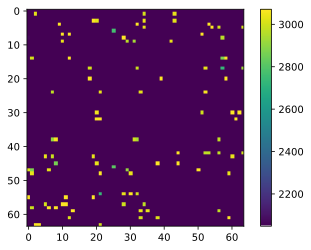

In [220]:
plt.imshow(npdata.reshape(3,64,64)[2])
plt.colorbar()

In [141]:
drv.ser.flushInput()
drv.ser.write(f'402'.encode() )
value = drv.ser.read(2 * 256 * 48)
len(value)

11776

In [140]:
value = struct.unpack('<' +'H'*256*48, value)

error: unpack requires a buffer of 24576 bytes

In [243]:
data = a0.pic_read_batch(gain=3, Vread=0.2)

Wait for data r=0
Wait for data r=0


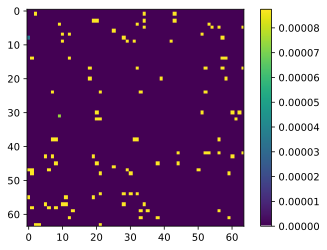

In [244]:
plt.imshow(data[2] / 0.2)
plt.colorbar()